In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from src.feature_engineering import (
    apply_feature_engineering,
    drop_all_zero_entries,
    choose_acc_ids,
)

## Choose Account to have a look at

In [2]:
ACC_ID = 50

In [3]:
# Replace with your actual data loading code
file_path = Path("../data/final/merged_double_digit.csv")
df = pd.read_csv(file_path, index_col=None, header=0)

# Convert 'Year' to a relative year
df["Year"] = df["Year"] - df["Year"].min()

# Sort dataframe and apply feature engineering
df = df.sort_values(by="Year")
df = apply_feature_engineering(df)
df = drop_all_zero_entries(df)
df = choose_acc_ids(df, [ACC_ID]) # Choose your account


In [4]:
# Calculate the percentage difference and handle division by zero
df['Percentage Difference'] = ((df['Budget y'] - df['Realized']) / df['Realized']).replace([np.inf, -np.inf], np.nan) * 100

In [5]:
df.tail()

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
10243,11,NE,50,58098.964,109359.89108,109318.12600,51260.92708,48415.57335,40412.04516,88.230363
10203,11,LU,50,165356.657,210875.00000,213964.00000,45518.34300,143369.60850,103314.77333,27.527373
10043,11,GE,50,339398.300,522397.72180,436265.72125,182999.42180,378741.01600,369930.86200,53.918780
10123,11,GR,50,134522.200,160480.00000,179396.00000,25957.80000,132033.00000,146703.20000,19.296295
10083,11,GL,50,19472.000,22260.00000,24815.00000,2788.00000,17327.40000,19498.90000,14.317995


In [6]:
df.describe()

,Year,Acc-ID,Realized,Budget y,Budget y+1,Slack,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
count,299.000000,299.0,299.000000,2.990000e+02,2.990000e+02,299.000000,274.000000,255.000000,299.000000
mean,5.779264,50.0,156747.409296,1.834683e+05,1.818932e+05,28406.223050,148846.099611,147523.975401,26.362975
std,3.305188,0.0,177126.409347,1.925638e+05,1.968433e+05,53169.853061,179465.513687,175213.554809,37.643758
min,0.000000,50.0,2592.300000,0.000000e+00,0.000000e+00,-285230.666810,0.000000,0.000000,-100.000000
25%,3.000000,50.0,28682.189195,3.180775e+04,2.830700e+04,3860.641810,20758.731125,20586.500000,8.559074
50%,6.000000,50.0,106480.721000,1.354550e+05,1.216450e+05,15020.500000,100122.706415,103314.773330,20.361953
75%,9.000000,50.0,221822.958855,2.438155e+05,2.375235e+05,36612.163500,198982.170672,198679.539025,36.916167
max,11.000000,50.0,994966.000000,1.086300e+06,1.086300e+06,255340.500000,994966.000000,994966.000000,432.900627


## Aggregated Relative Difference

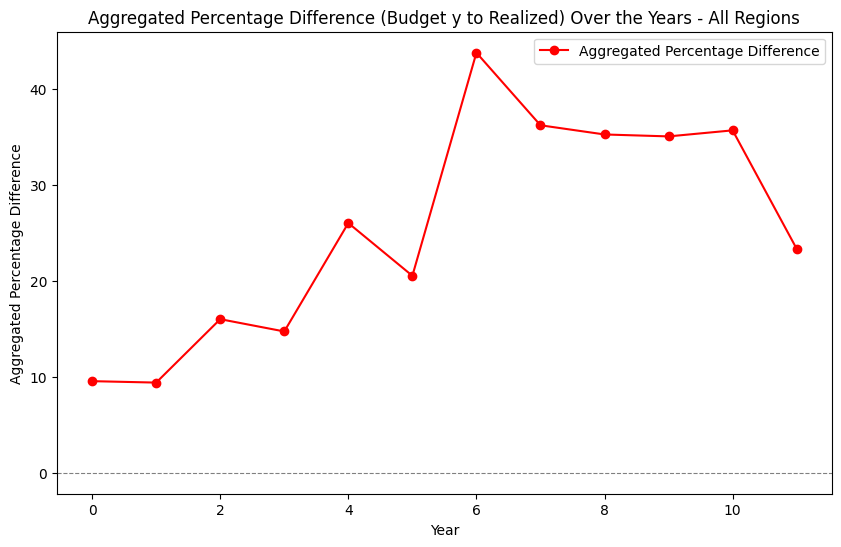

In [7]:
aggregated_data = df.groupby('Year')['Percentage Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data, marker='o', linestyle='-', color='red', label='Aggregated Percentage Difference')
plt.title('Aggregated Percentage Difference (Budget y to Realized) Over the Years - All Regions')
plt.xlabel('Year')
plt.ylabel('Aggregated Percentage Difference')
plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
plt.legend()
plt.show()


## Relative Difference per Region

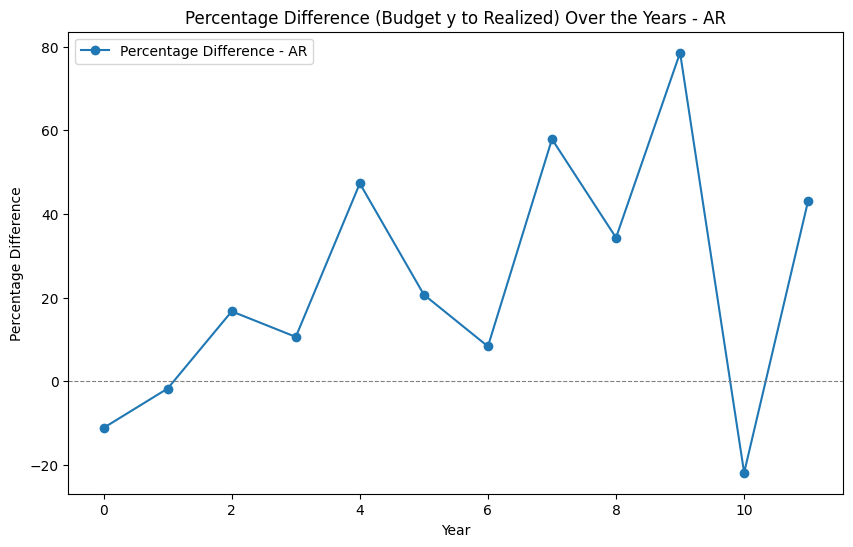

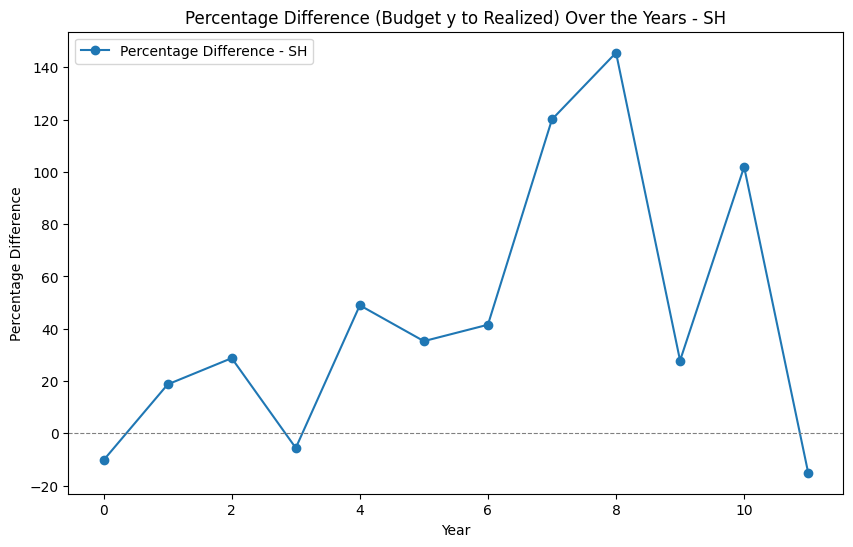

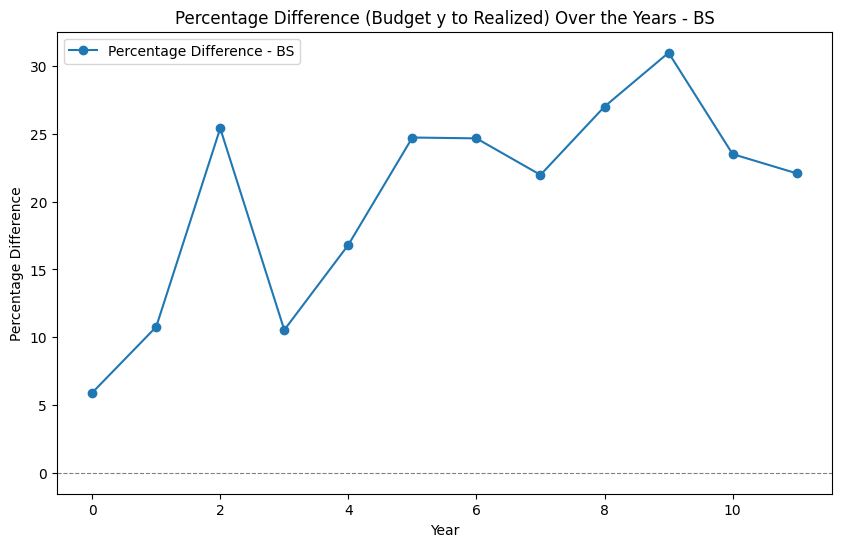

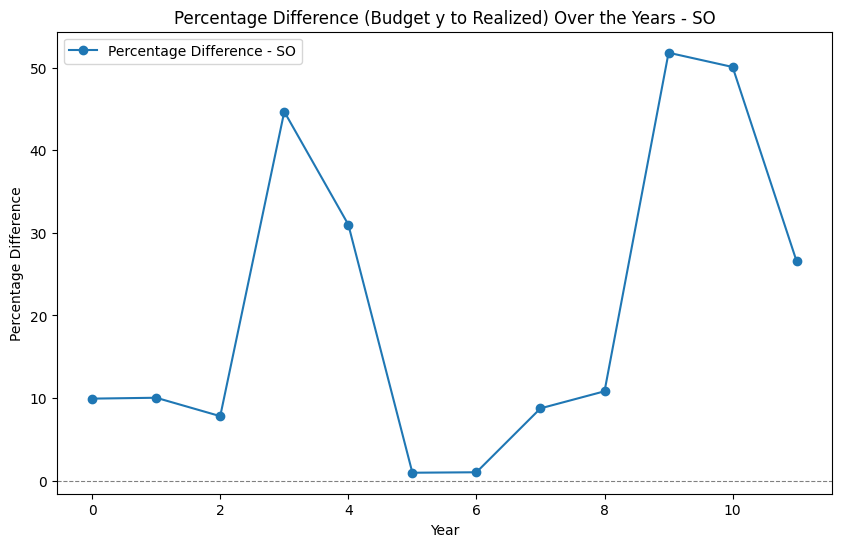

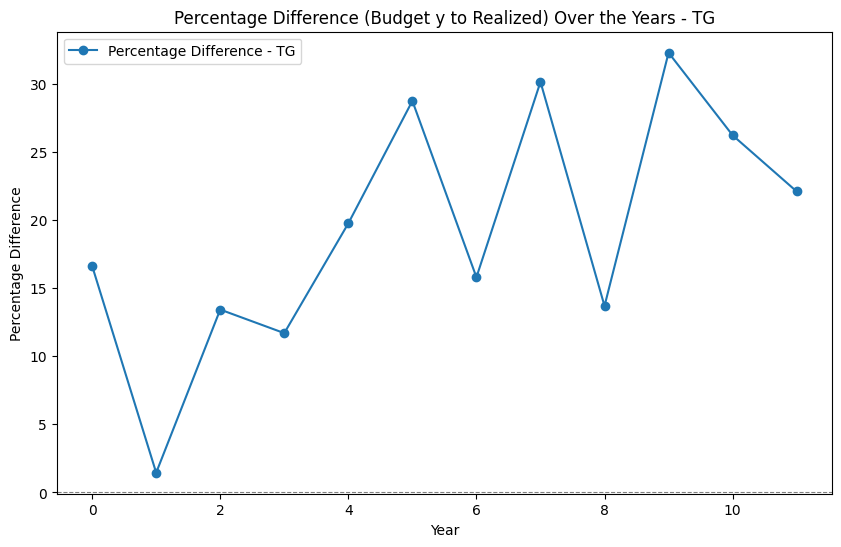

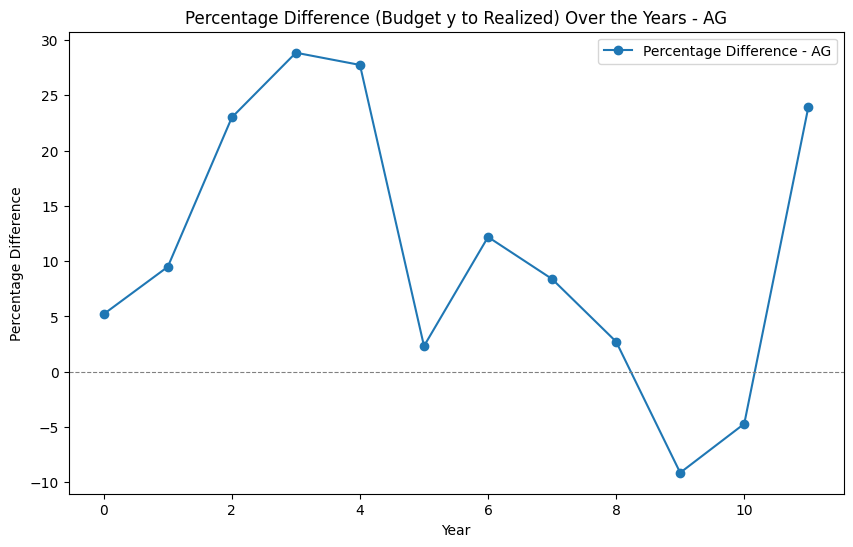

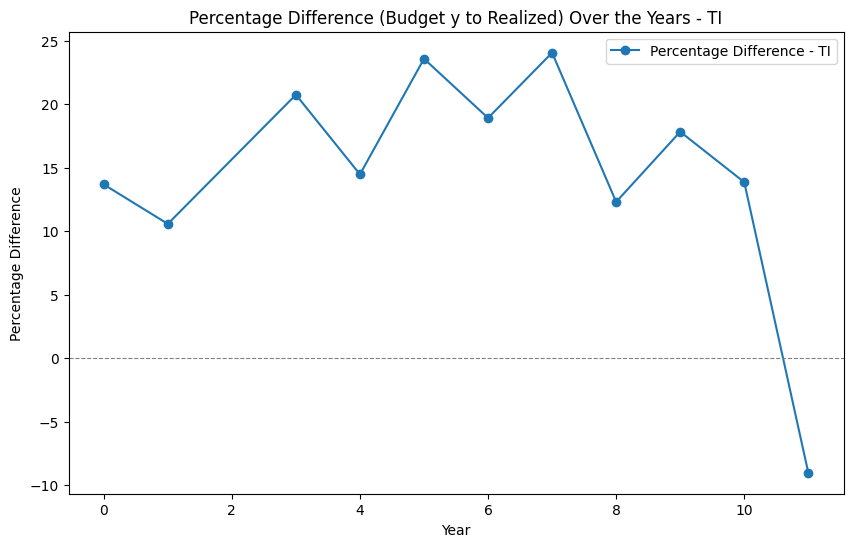

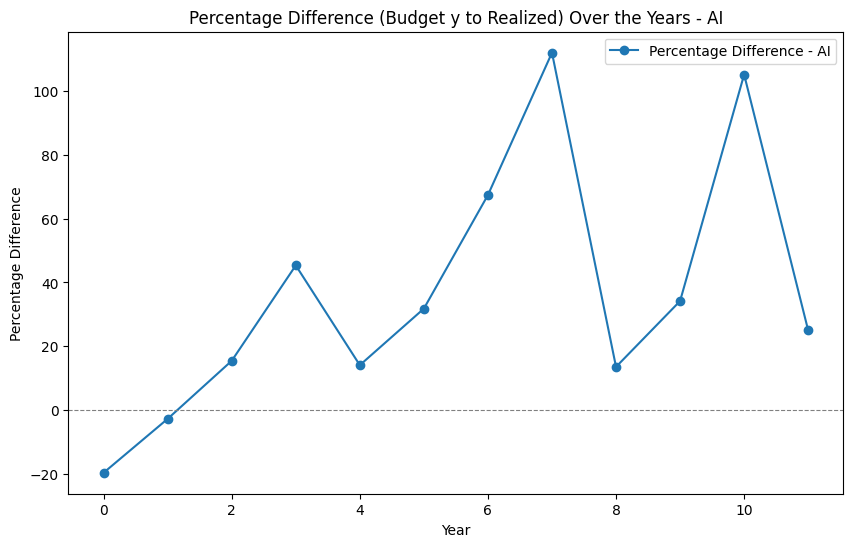

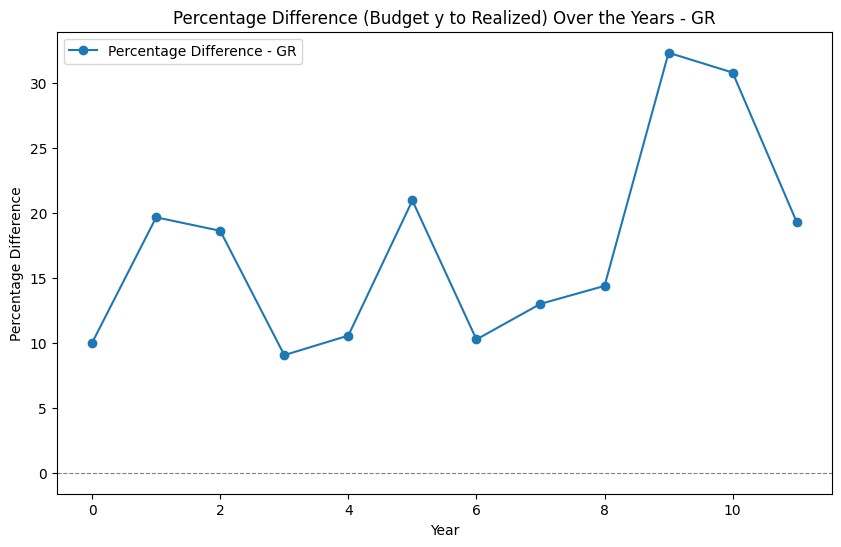

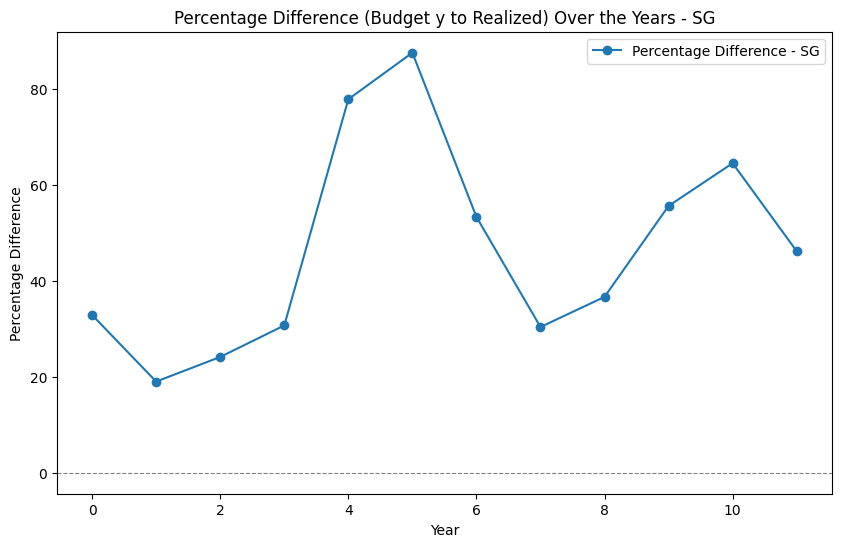

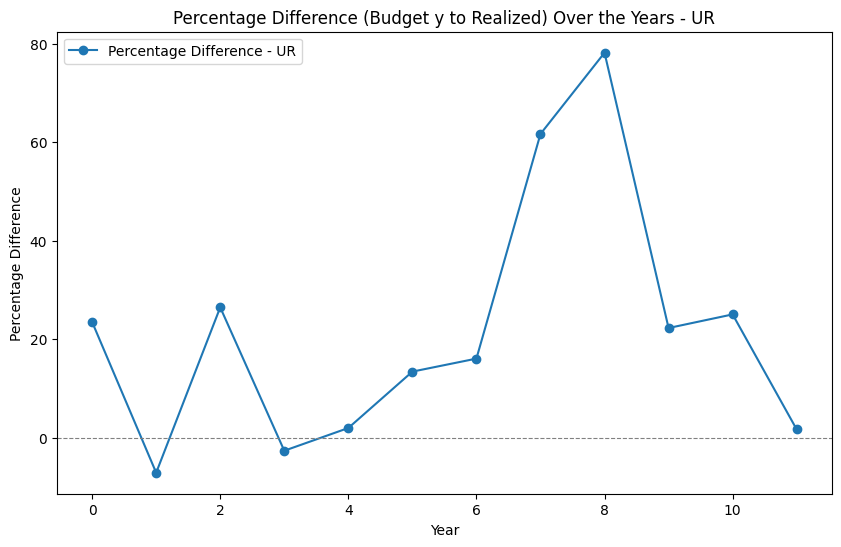

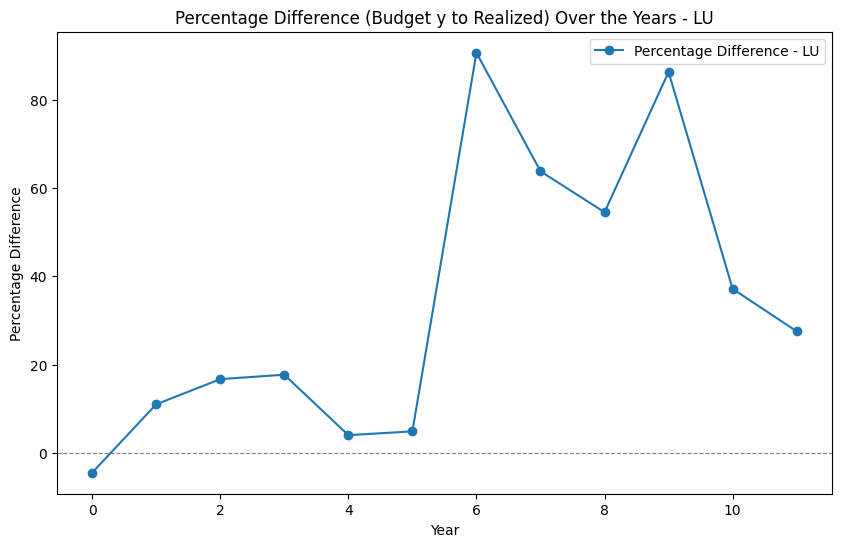

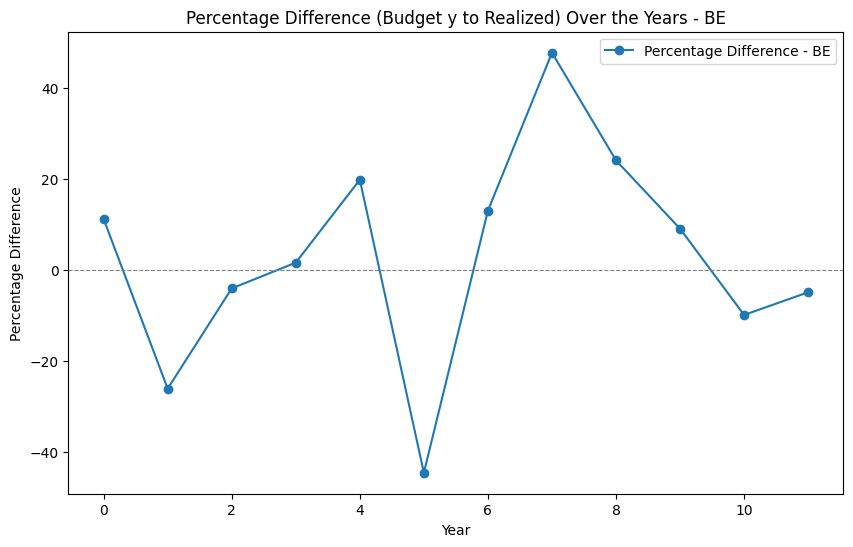

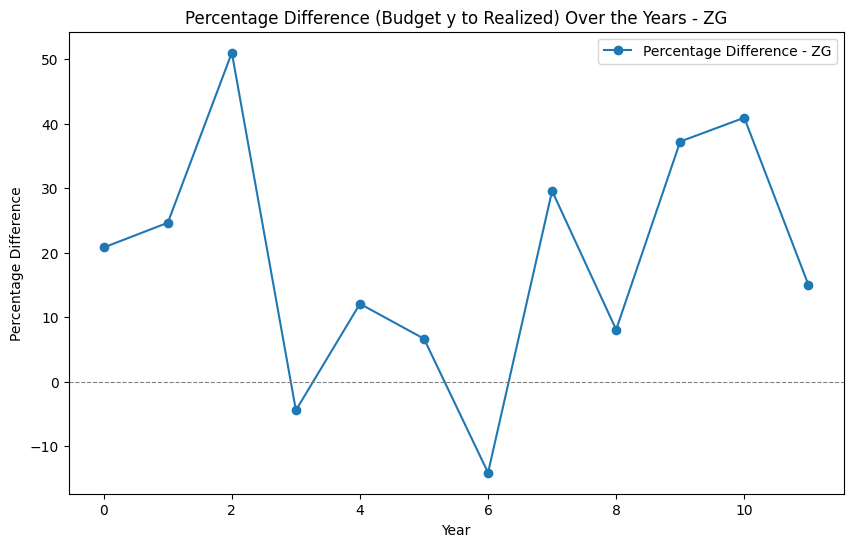

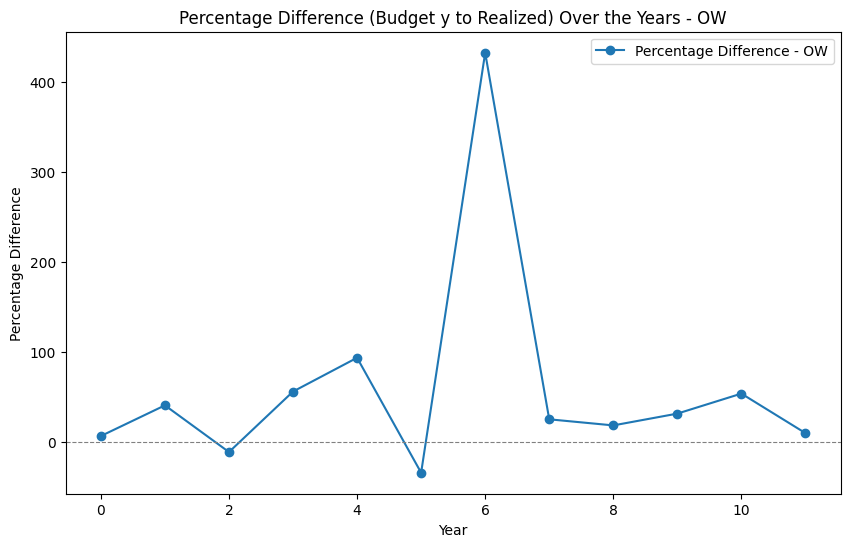

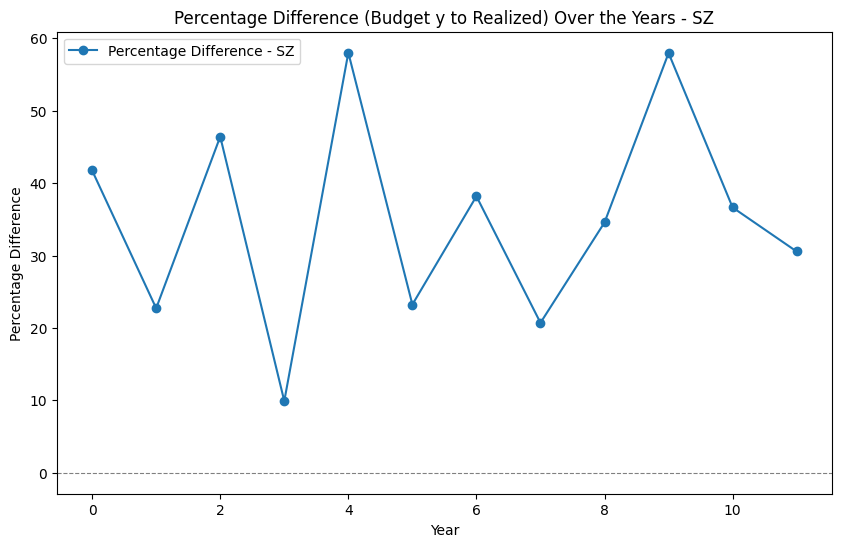

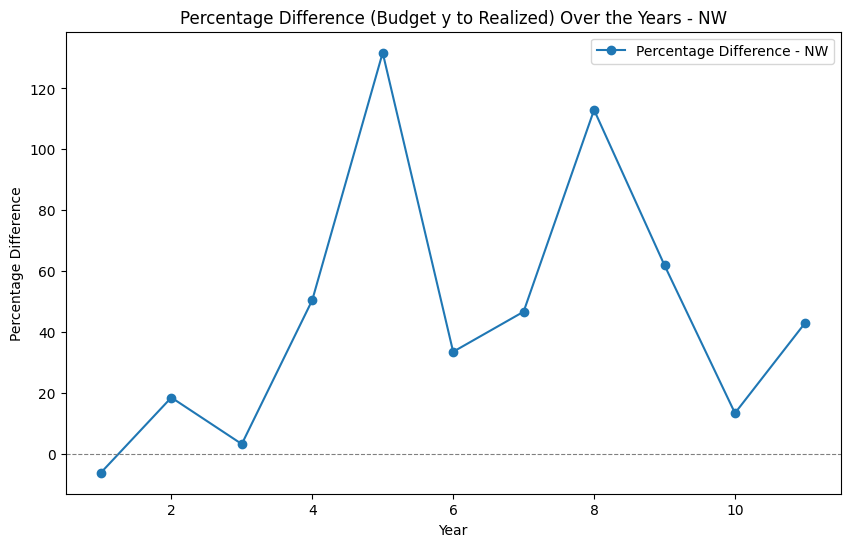

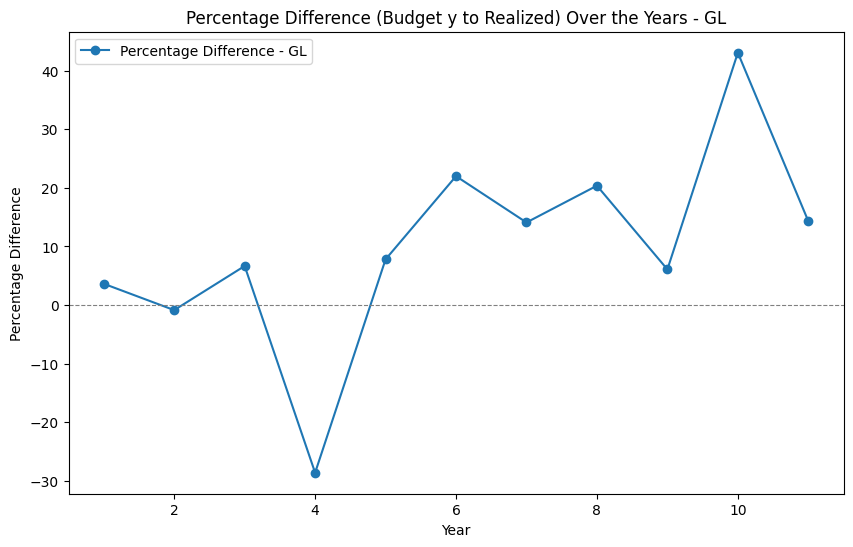

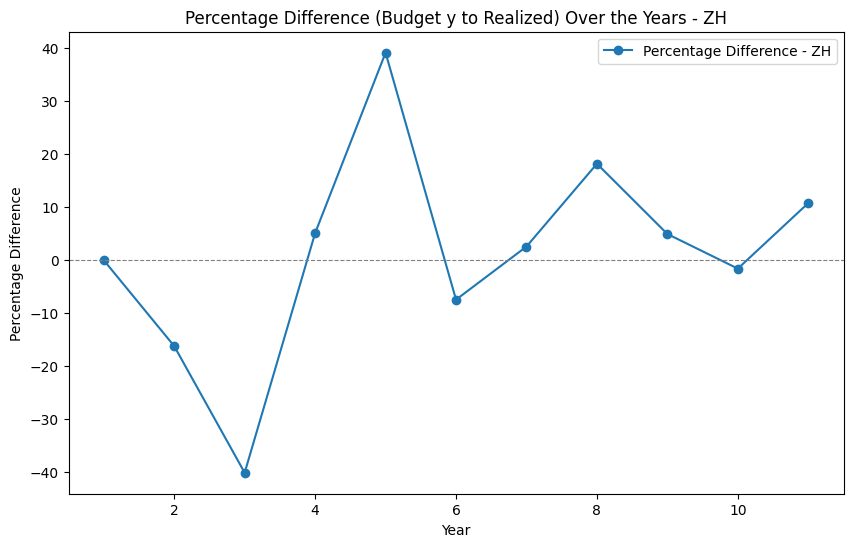

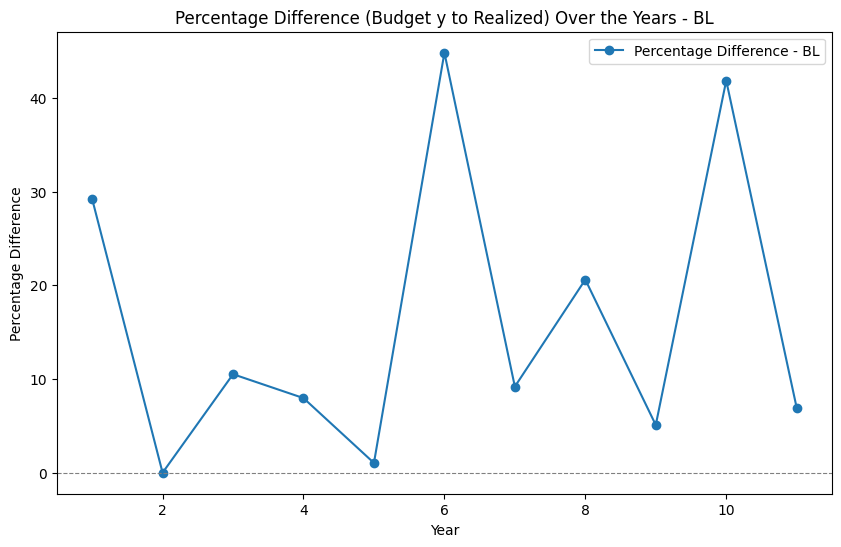

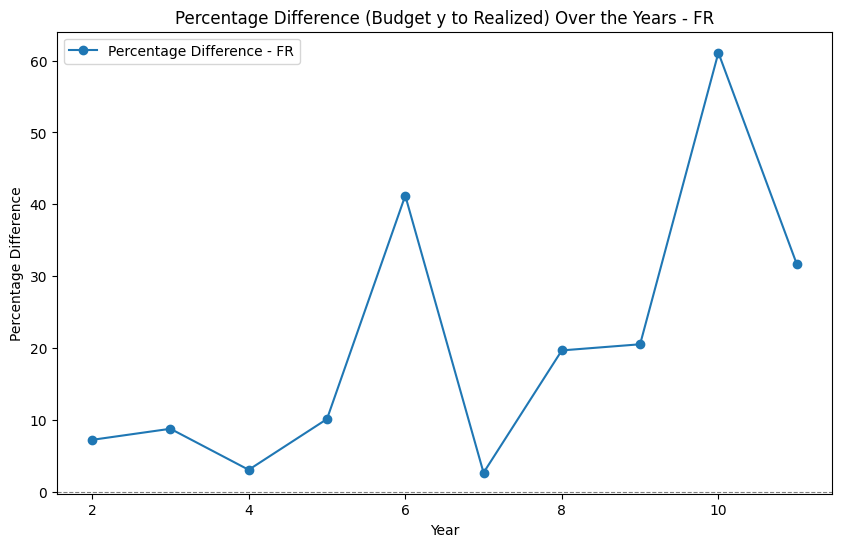

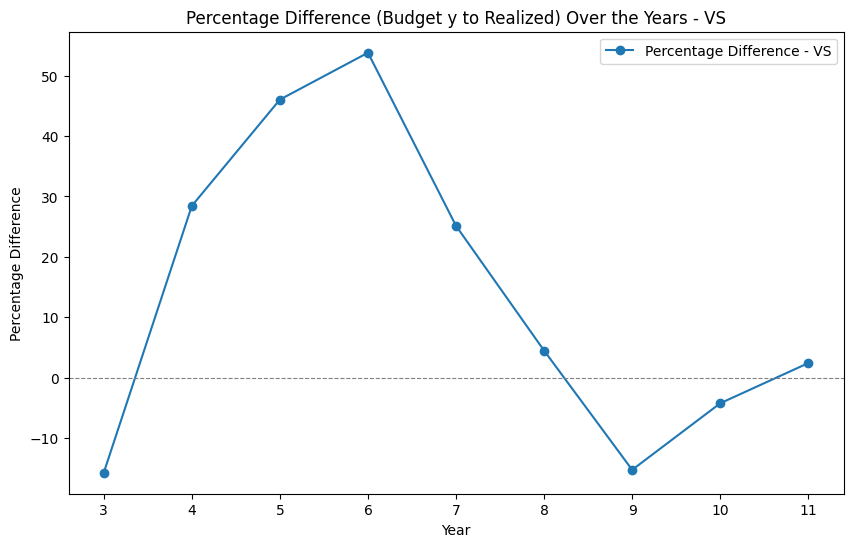

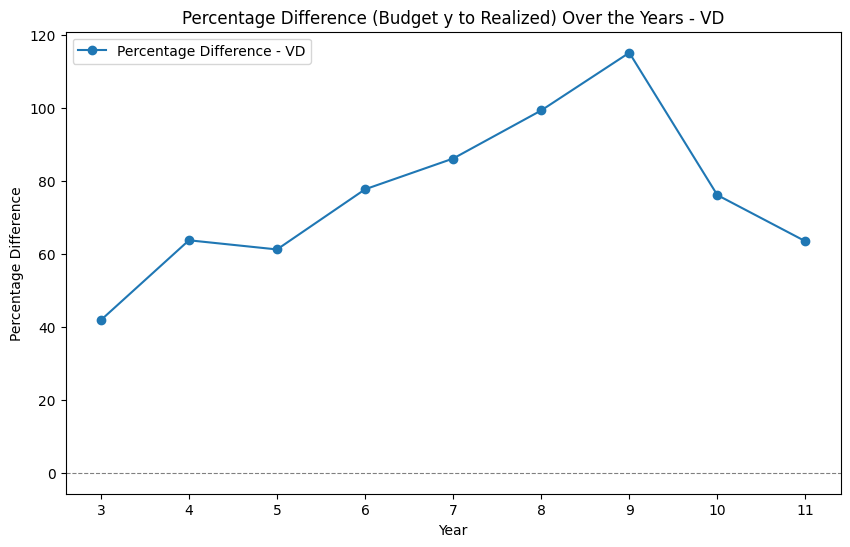

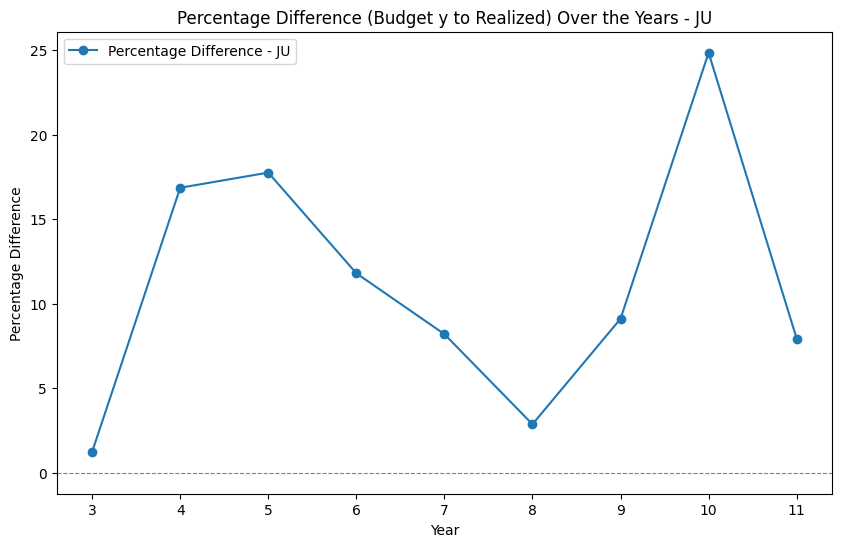

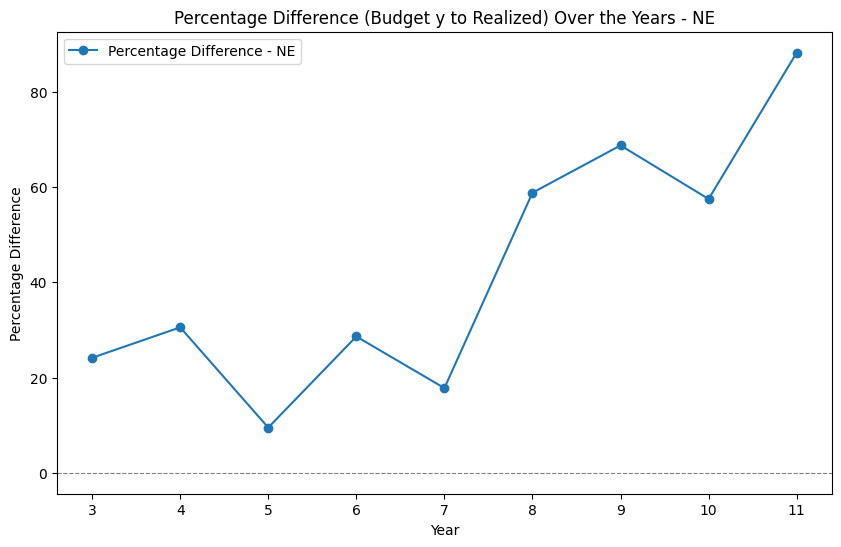

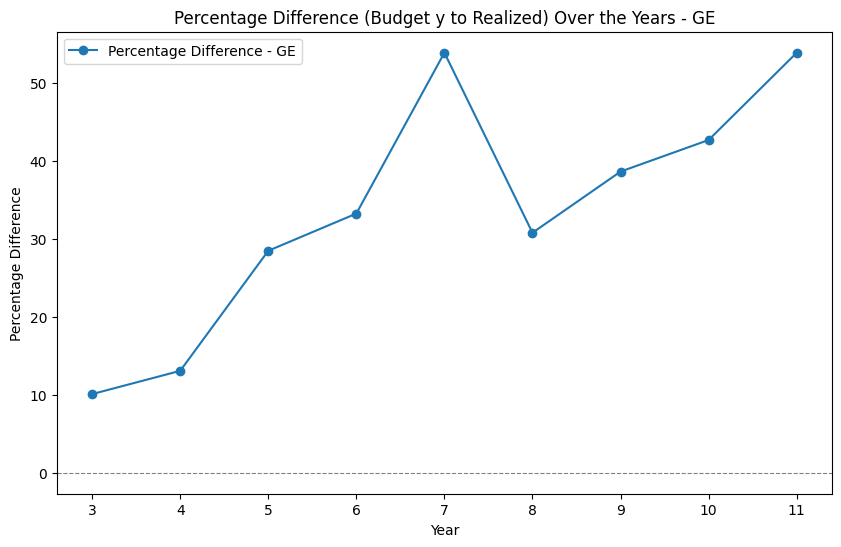

In [8]:
regions = df['Region'].unique()

for region in regions:
    region_data = df[df['Region'] == region].groupby('Year')['Percentage Difference'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(region_data.index, region_data, marker='o', linestyle='-', label=f'Percentage Difference - {region}')
    plt.title(f'Percentage Difference (Budget y to Realized) Over the Years - {region}')
    plt.xlabel('Year')
    plt.ylabel('Percentage Difference')
    plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
    plt.legend()
    plt.show()
